In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import re # Regular expression matching
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os, glob, pickle, gc
import math

mpl.rcParams['figure.figsize'] = (13,9)
mpl.rcParams['font.size'] = 30


In [2]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

In [3]:
# Plot area sizes...
left, width = 0.125, 0.7
bottom, height = 0.1, 0.85

plot_area = [left, bottom, width, height]

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5,.5,.5,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(-7.5,0,16)
ticks  =[-7,-6,-5,-4,-3,-2,-1,0]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [4]:
dotNorm = 10.0  # For dot-size scaling

In [5]:
z=16.0;sbox =  5.0 / (1.0 + z) * 0.71
i=770
print ("z=%.1lf, sbox=%.2lf"%(z,sbox))
ymax = 10**5.2

x,y,zz = np.loadtxt("z%05.2f_SpCoord_%d.txt"%(z,i))
locs = np.loadtxt("spLocHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) - np.array([x,y,zz]) # Normalize
mass = np.loadtxt("spMassHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1)
Z    = np.loadtxt("spZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPFHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1)

fpol = (1-PPF)
fpol[fpol<1e-7] = 0 # Don't let tiny numbers magnify Z !! Just use Z = 0 for these guys

# Do the correcting before fixing Z for subcritical values... otherwise, we bias Z/f_pol
Zf=Z/fpol # This is our Z corrected for f_pol
Zf[np.isinf(Zf)] = 10**-7.5 # Fix Zf for sp's with very very low polluted fractions. They are essentially pristine
Zf[np.isnan(Zf)] = 10**-7.5
Zf[Zf<1e-5] = 10**-7.5

Z[Z<1e-5] = 10**-7.5

PZf=PZ/fpol
PZf[np.isinf(PZf)] = 10**-7.5
PZf[np.isnan(PZf)] = 10**-7.5

PZ[PZ<1e-5] = 10**-7.5

# Pick out stars by metallicity range... 
rng1 = (Z < 1.e-5)
rng2 = ((Z >= 1.e-5) & (Z < 1.e-3))
rng3 = ((Z >= 1.e-3) & (Z < 1.e-1))
rng4 = (Z >= 1.e-1)

# Pick out stars by corrected metallicity range... 
rngf1 = (Zf < 1.e-5)
rngf2 = ((Zf >= 1.e-5) & (Zf < 1.e-3))
rngf3 = ((Zf >= 1.e-3) & (Zf < 1.e-1))
rngf4 = (Zf >= 1.e-1)

# Pick out stars by pristine fraction, in ranges... 
pfrng1 = (PPF < 1.e-5)
pfrng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
pfrng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
pfrng4 = (PPF >= 1.e-1)

pzrng1 = (PZ < 1.e-5)
pzrng2 = ((PZ >= 1.e-5) & (PZ < 1.e-3))
pzrng3 = ((PZ >= 1.e-3) & (PZ < 1.e-1))
pzrng4 = (PZ >= 1.e-1)

pzrngf1 = (PZf < 1.e-5)
pzrngf2 = ((PZf >= 1.e-5) & (PZf < 1.e-3))
pzrngf3 = ((PZf >= 1.e-3) & (PZf < 1.e-1))
pzrngf4 = (PZf >= 1.e-1)
z1=np.log10(Z[rng1])
z2=np.log10(Z[rng2])
z3=np.log10(Z[rng3])
z4=np.log10(Z[rng4])

zf1=np.log10(Zf[rngf1]) # zf is the corrected Z of the star particle
zf2=np.log10(Zf[rngf2])
zf3=np.log10(Zf[rngf3])
zf4=np.log10(Zf[rngf4])

pf1=np.log10(PPF[pfrng1])
pf2=np.log10(PPF[pfrng2])
pf3=np.log10(PPF[pfrng3])
pf4=np.log10(PPF[pfrng4])

pz1=np.log10(PZ[pzrng1])
pz2=np.log10(PZ[pzrng2])
pz3=np.log10(PZ[pzrng3])
pz4=np.log10(PZ[pzrng4])

pzf1=np.log10(PZf[pzrngf1])
pzf2=np.log10(PZf[pzrngf2])
pzf3=np.log10(PZf[pzrngf3])
pzf4=np.log10(PZf[pzrngf4])

z=16.0, sbox=0.21


/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide


In [6]:
np.sum(mass),np.sum(mass[pzrngf1])+np.sum(mass[pzrngf1])+np.sum(mass[pzrngf1])+np.sum(mass[pzrngf1])

(534922.07348140841, 365698.04450816393)

# Compute histogram for the halo

In [15]:
axLabelSize=34

In [16]:
# Slightly offset bins so we can see the data.
# 51 Z bins from -10 to 0
numBins=52
minB=-5.1;maxB=0
xrange1 = np.logspace(minB,maxB,numBins) # 1e-10, 1e-9.8, 1e-9.6, ... 
xrange2 = np.logspace(minB+.02,maxB+0.02,numBins) # 1e-9.96, 1e-9.76, 1e-9.56, ... 
xrange3 = np.logspace(minB+.04,maxB+0.04,numBins) # 1e-9.92, 1e-9.72, 1e-9.52, ... 
xrange4 = np.logspace(minB+.06,maxB+0.06,numBins) # 1e-9.92, 1e-9.72, 1e-9.52, ... 

In [17]:
# Use uncorrected Z for bins
# Make these points closer to -7
Z[Z<1e-5] = 10**-5.001
# Zf[Zf<1e-5] = 1e-7
# PZ[PZ<1e-5] = 1e-7

# Reset PZ < Z_crit to 0 so we don't end up with 1e-8/1e-8 = 1 for primordial metals... 
temp = PZ
temp[temp < 1e-5] = 0.0

bins    = np.logspace(minB, maxB, numBins) # Log bins for histogram data 
psm     = np.zeros(numBins-1) # Pristine Stellar mass in that bin
tsm     = np.zeros(numBins-1) # total mass
zsm     = np.zeros(numBins-1) # total polluted mass
avePPF  = np.zeros(numBins-1) # Ave pristine fraction in bin
primsm  = np.zeros(numBins-1) # Primordial stellar mass
for indx2,j in enumerate(bins):
    if indx2 < len(bins)-1:
        theBin = (Z >= j) & (Z < bins[indx2+1]) # Bin the particles in <Z>

        tsm[indx2] = np.sum(mass[theBin]) # Total mass for sp's with <Z> in bin
        psm[indx2] = np.sum(PPF[theBin] * mass[theBin]) # Pop III mass in bin
        avePPF[indx2] = np.sum(PPF[theBin])/len(PPF[theBin])
        # For sp's that are in our bin:
        #   Compute the polluted fraction * pristine metals fraction: f_pol * Z_P/Z
        #   Compute the mass of stars that are polluted only by pristine metals
        # Remember, we're only looking at stars in the bin, bin_lower < Z < bin_upper
        primsm[indx2] = np.sum(fpol[theBin] * (temp[theBin] / Z[theBin]) * mass[theBin]) 
        zsm[indx2]    = np.sum(fpol[theBin] * mass[theBin]) # Mass of stars that are polluted and have <Z> in bin

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [18]:
print("Total Pop III stellar mass=",np.sum(psm))
print("Total Pop III mass =",np.sum(mass) - np.sum(mass * fpol))

Total Pop III stellar mass= 304459.223584
Total Pop III mass = 304459.223584


In [19]:
tsm2 = np.empty((2*(tsm.size)), dtype=tsm.dtype)
tsm2[0::2] = tsm 
tsm2[1::2] = tsm
psm2 = np.empty((2*(psm.size)), dtype=psm.dtype)
psm2[0::2] = psm 
psm2[1::2] = psm
primsm2 = np.empty((2*(primsm.size)), dtype=primsm.dtype)
primsm2[0::2] = primsm 
primsm2[1::2] = primsm

In [20]:
newx = np.empty((2*(xrange1.size - 1)), dtype=xrange1.dtype)
newx[0::2] = xrange1[0:numBins-1]
newx[1::2] = xrange1[1:numBins]
print(newx.size)

102


In [21]:
# Create columns over bin width
avePPF2 = np.empty((2*(avePPF.size)), dtype=avePPF.dtype)
avePPF2[0::2] = avePPF 
avePPF2[1::2] = avePPF
avePPF2[avePPF2<1e-6] = 0.0

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


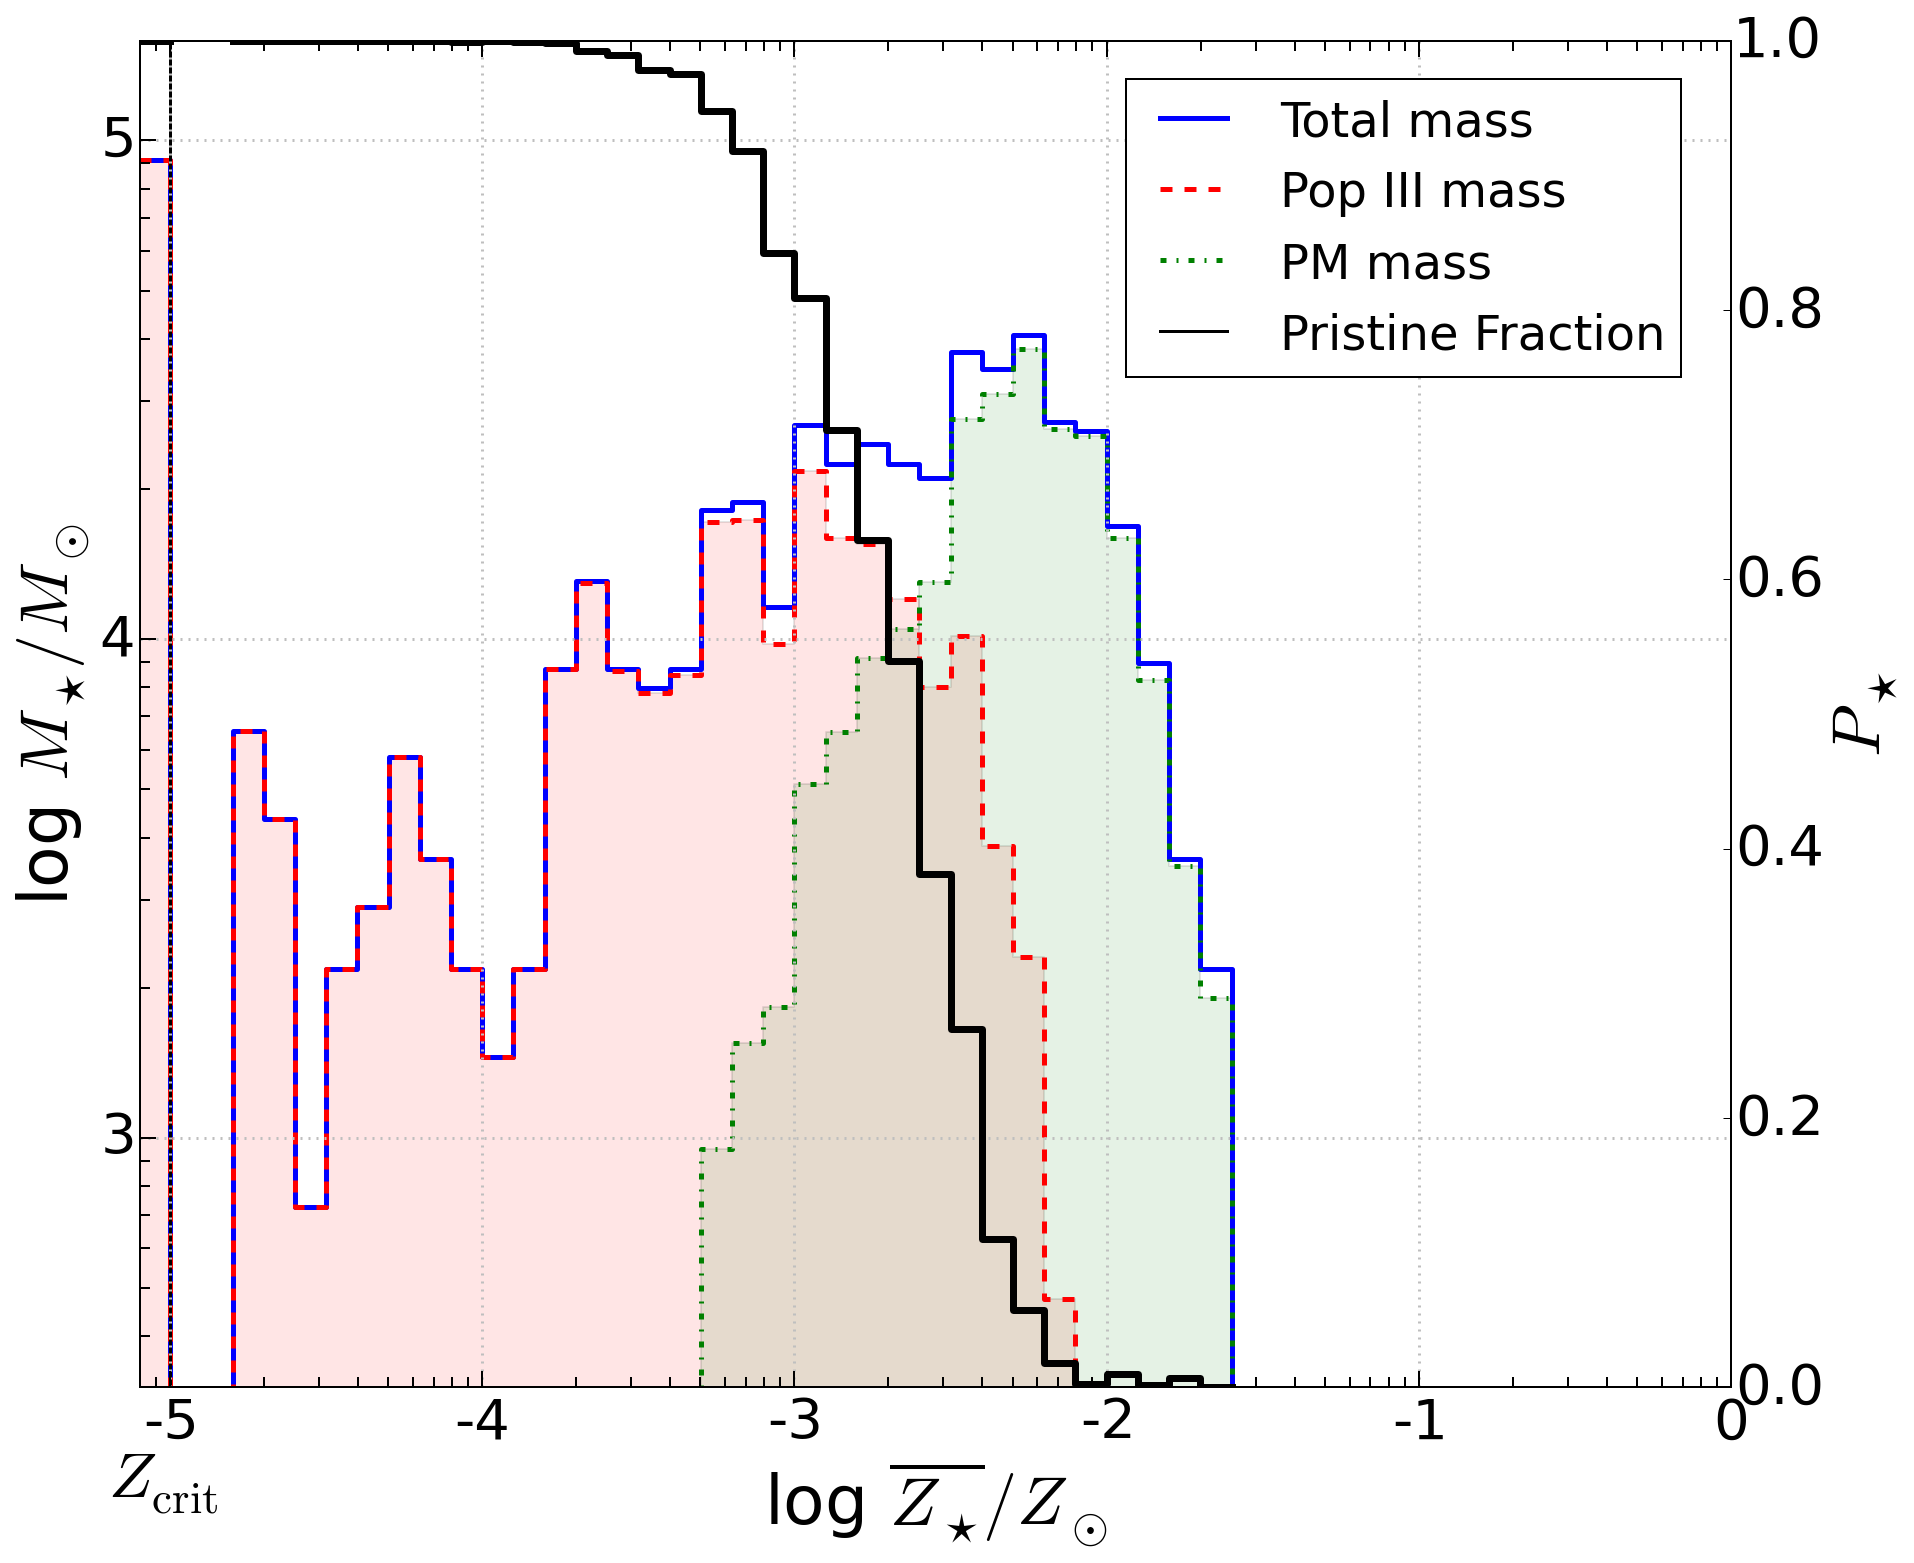

In [24]:
# With blocky transitions
 

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
fig = plt.figure()
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([8*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel(r'log $\overline{Z_{\star}} /Z_{\odot}$', size=axLabelSize)
axHist.set_ylabel('log $M_{\star}/M_{\odot}$', size=axLabelSize)

axHist.plot(newx,tsm2,'b-',  linewidth = 2.5)
axHist.plot(newx,psm2, 'r--', linewidth = 2.5 )
axHist.plot(newx,primsm2,'g-.', linewidth = 2.5 )
#axHist.plot(xrange4[1:numBins],zsm,'m:*', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(newx, 0, psm2, facecolor='r', alpha=0.1)
axHist.fill_between(newx, 0, primsm2, facecolor='g', alpha=0.1)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate(r"$Z_{\rm crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )
axHist.tick_params('both', length=5, width=1, which='minor')
axHist.tick_params('both', length=8, width=1, which='major')

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass',r'Pristine Fraction'],
              loc=(0.62,0.75), fontsize=24 )

ax2 = axHist.twinx()
ax2.plot(newx,avePPF2,'k-', linewidth = 3.5 )
ax2.set_xlim([8*1e-6,1])
#ax2.get_yaxis().set_visible(False)
ax2.set_ylabel(r'$P_{\star}$', size=axLabelSize)

plt.savefig("Hist_HaloData_z={:04.1f}SFRegion_dualAx.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [106]:
# Use CORRECTED Z for bins
# Make these points closer to -7
Z[Z<1e-5] = 10**-5.001
Zf[Zf<1e-5] = 10**-5.001
PZ[PZ<1e-5] = 10**-5.001

# Reset PZ < Z_crit to 0 so we don't end up with 1e-8/1e-8 = 1 for primordial metals... 
temp = PZ
temp[temp < 1e-5] = 0.0

bins    = np.logspace(minB, maxB, numBins) # Log bins for histogram data 
psm     = np.zeros(numBins-1) # Pristine Stellar mass in that bin
tsm     = np.zeros(numBins-1) # total mass
zsm     = np.zeros(numBins-1) # total polluted mass
primsm  = np.zeros(numBins-1) # Primordial stellar mass
avePPF  = np.zeros(numBins-1) # Ave pristine fraction in bin
for indx2,j in enumerate(bins):
    if indx2 < len(bins)-1:
        theBin = (Zf >= j) & (Zf < bins[indx2+1]) # This selects for sp's in the bin that have Z/f_pol

        tsm[indx2] = np.sum(mass[theBin])
        psm[indx2] = np.sum(PPF[theBin] * mass[theBin])
        avePPF[indx2] = np.sum(PPF[theBin])/len(PPF[theBin])
        # For sp's that are in our bin:
        #   Compute the polluted fraction * pristine metals fraction: f_pol * pzf/Z
        #   Compute the mass of stars that are polluted only by pristine metals
        primsm[indx2] = np.sum(fpol[theBin] * (temp[theBin] / Z[theBin]) * mass[theBin])
        zsm[indx2]    = np.sum(fpol[theBin] * mass[theBin])

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [107]:
tsm2 = np.empty((2*(tsm.size)), dtype=tsm.dtype)
tsm2[0::2] = tsm 
tsm2[1::2] = tsm
psm2 = np.empty((2*(psm.size)), dtype=psm.dtype)
psm2[0::2] = psm 
psm2[1::2] = psm
primsm2 = np.empty((2*(primsm.size)), dtype=primsm.dtype)
primsm2[0::2] = primsm 
primsm2[1::2] = primsm

In [108]:
newx = np.empty((2*(xrange1.size - 1)), dtype=xrange1.dtype)
newx[0::2] = xrange1[0:numBins-1]
newx[1::2] = xrange1[1:numBins]
print(newx.size)

102


In [109]:
# Create columns over bin width
avePPF2 = np.empty((2*(avePPF.size)), dtype=avePPF.dtype)
avePPF2[0::2] = avePPF 
avePPF2[1::2] = avePPF
avePPF2[avePPF2<1e-6] = 0.0

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


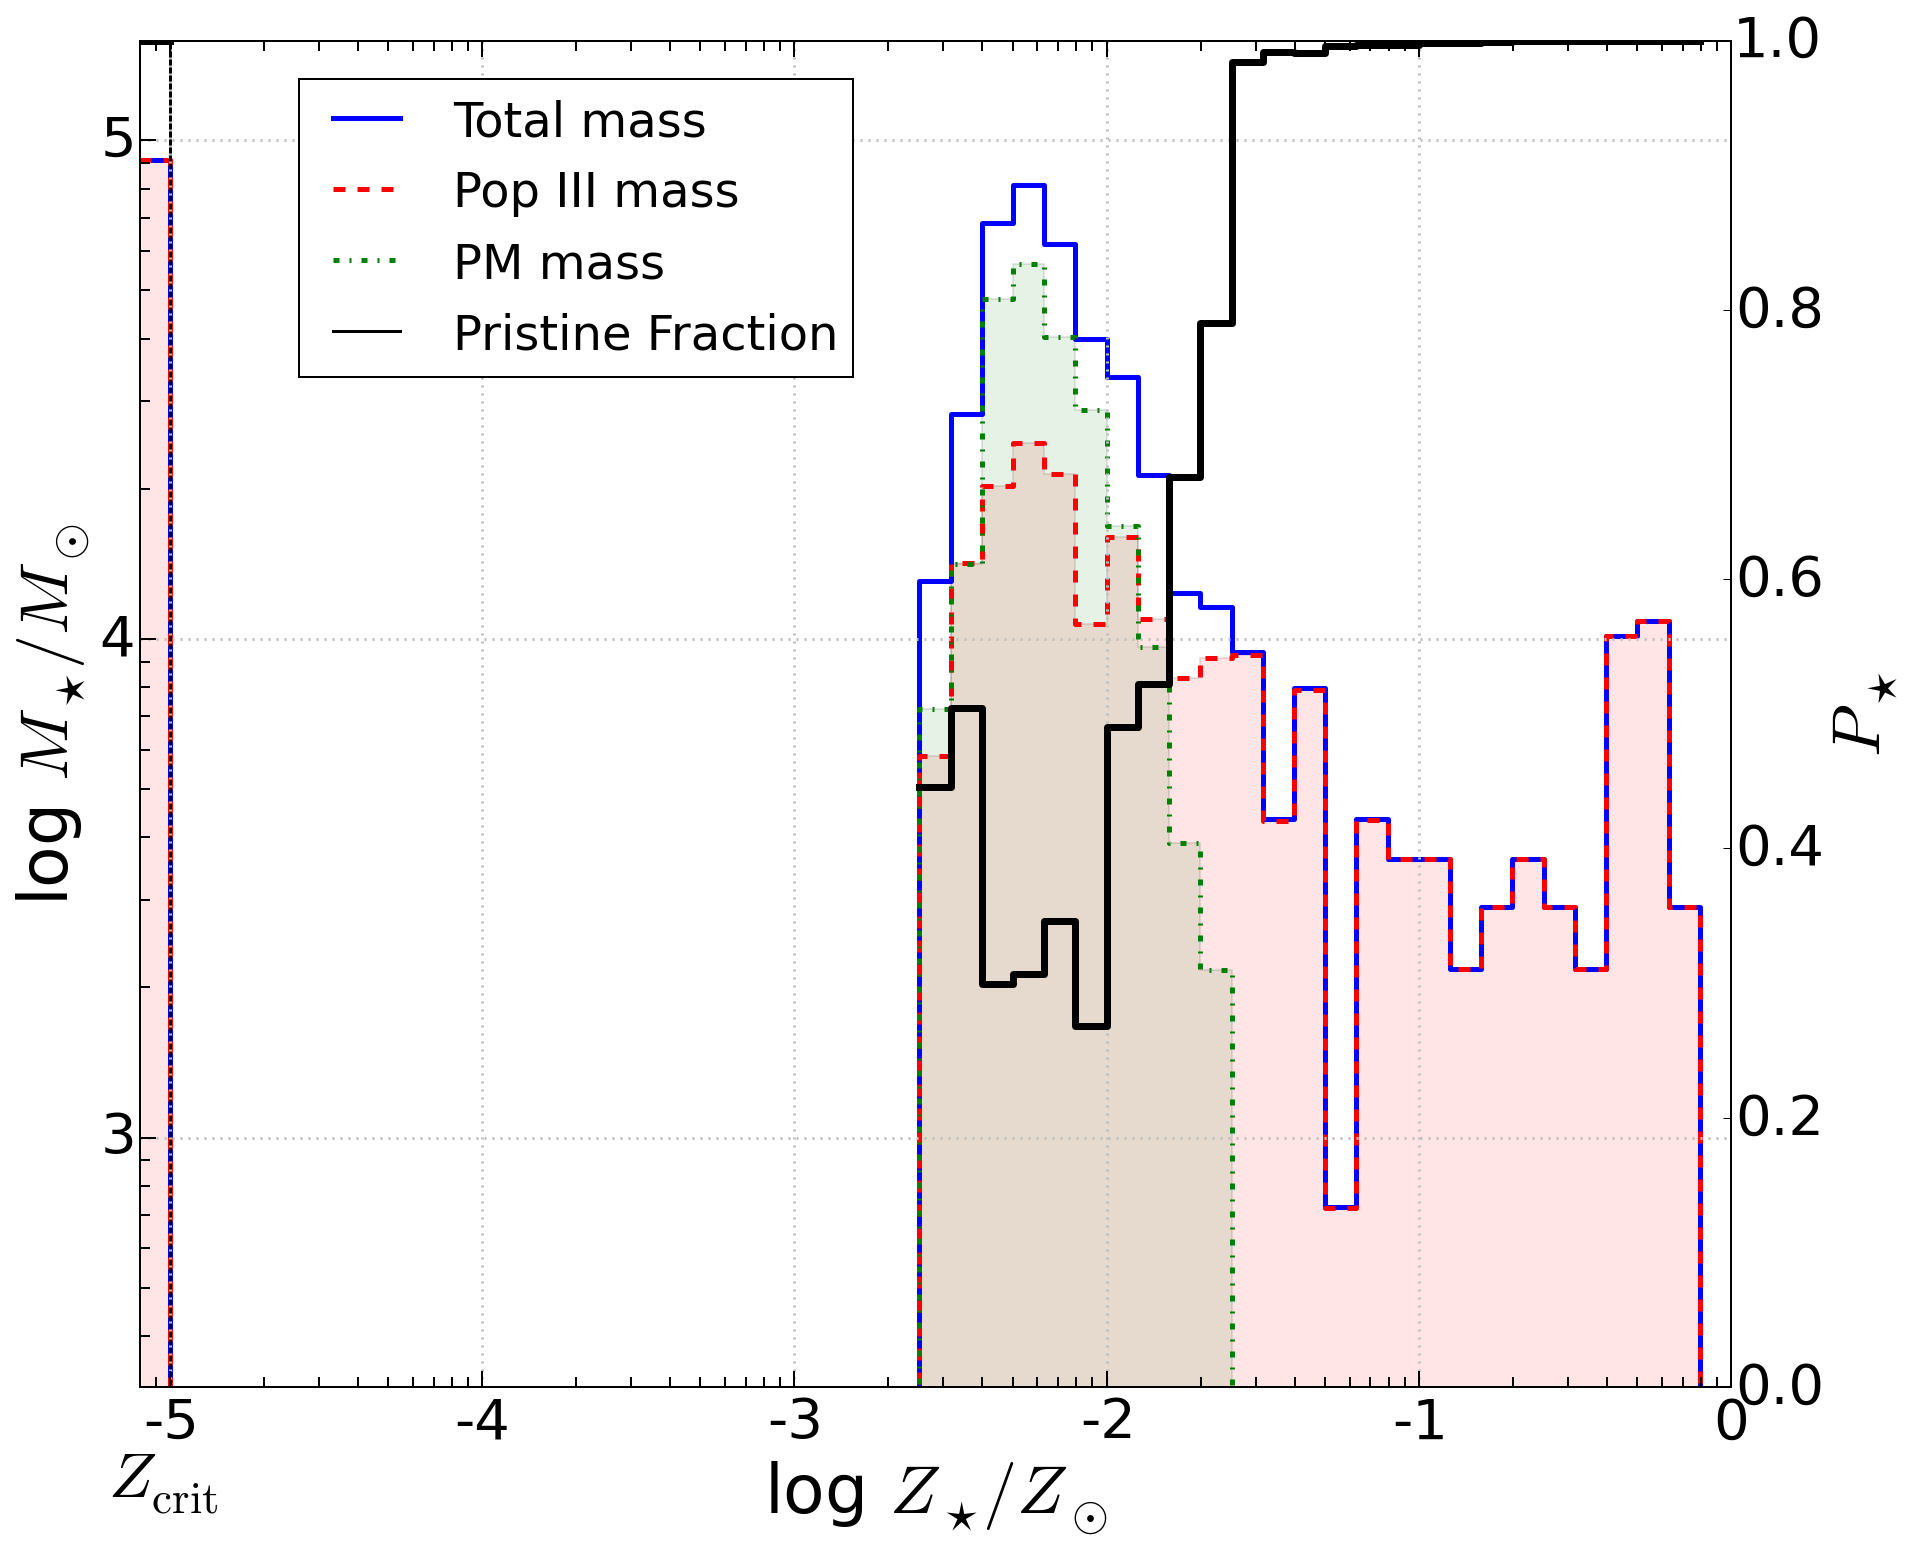

In [110]:
# With blocky transitions
 
fig = plt.figure()
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([8*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M_{\star}/M_{\odot}$', size=axLabelSize)

axHist.plot(newx,tsm2,'b-',  linewidth = 2.5)
axHist.plot(newx,psm2, 'r--', linewidth = 2.5 )
axHist.plot(newx,primsm2,'g-.', linewidth = 2.5 )
#axHist.plot(xrange4[1:numBins],zsm,'m:*', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(newx, 0, psm2, facecolor='r', alpha=0.1)
axHist.fill_between(newx, 0, primsm2, facecolor='g', alpha=0.1)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate(r"$Z_{\rm crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )
axHist.tick_params('both', length=5, width=1, which='minor')
axHist.tick_params('both', length=8, width=1, which='major')

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass',r'Pristine Fraction'],
              loc=(0.1,0.75), fontsize=24 )

ax2 = axHist.twinx()
ax2.plot(newx,avePPF2,'k-', linewidth = 3.5 )
ax2.set_xlim([8*1e-6,1])
ax2.set_ylim([0,1.0])
ax2.set_ylabel(r'$P_{\star}$', size=axLabelSize)


plt.savefig("Hist_HaloData_z={:04.1f}SFRegion_fpol_dualAx.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [102]:
# Pop III fraction
subCrit = Zf < 1e-5
print("PopIII mass fraction for halo ",1-(np.sum(fpol * mass))/(np.sum(mass)))
print("Class PopIII % mass in halo ",(np.sum(mass[subCrit]))/(np.sum(mass)))
print("Class PopIII ALL PopIII for halo ",np.sum(mass[subCrit])/np.sum(PPF * mass))
print("PM for halo ",(np.sum(fpol * mass * temp/Z))/(np.sum(mass)))
print("PM metal fraction in halo",(np.sum(fpol* mass * temp/Z))/(np.sum(fpol*mass)))

PopIII mass fraction for halo  0.569165563879
Class PopIII % mass in halo  0.170911831198
Class PopIII ALL PopIII for halo  0.300284911886
PM for halo  0.425623944257
PM metal fraction in halo 0.987906045973


In [66]:
np.log10(np.linspace(1e-1,1e-2,10))

array([-1.        , -1.04575749, -1.09691001, -1.15490196, -1.22184875,
       -1.30103   , -1.39794001, -1.52287875, -1.69897   , -2.        ])

In [91]:
popiii = Zf >= 10**-1.6
print("Pristine fraction in range",
    1-(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))

Pristine fraction in range 0.99563198982


In [100]:
popiii = (10**-3 <= Zf) & (Zf < 10**-1.6)
print("Pop III in range ",
 1-(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))
print("Polluted ",(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))

popiii =  (Zf < 10**-1.6)
print("Pop III up to 1e-1.6: ",
 1-(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))


Pop III in range  0.380760393364
Polluted  0.619239606636
Pop III up to 1e-1.6:  0.503012780886


In [35]:
# PM
cond = (10**-2.7 < Zf) & (Zf <= 10**-1.9)
# cond = (10**-2.5 <= Zf) & (Zf < 10**-2)
print("PM in range",
 (np.sum(fpol[cond] * mass[cond] * temp[cond]/Z[cond]))/(np.sum(mass[cond])))

PM in range 0.648370289683


In [36]:
popiii = (10**-2.7 < Zf) & (Zf <= 10**-1.8)
print("PM in lower range",
 (np.sum(fpol[popiii] * mass[popiii] * temp[popiii]/Z[popiii]))/(np.sum(mass[popiii])))

PM in lower range 0.636439004041


In [103]:
print("Halo AVE mass=",np.sum(mass)/len(mass))
print("Halo Median mass=",np.median(mass))
print("Halo Max mass=",np.max(mass))
print("")
print("Halo total mass=",np.sum(mass))
print("Total Pop III mass=",np.sum(PPF * mass))
print("Pop III fraction=",np.sum(PPF * mass)/np.sum(mass))
print("PopIII/Classical PopIII=",np.sum(PPF * mass)/np.sum(mass[Zf < 1e-5]))
print("Classic/PopIII=",np.sum(mass[Zf < 1e-5])/np.sum(PPF * mass))
print("Mass weighted ave Z =",np.sum(Zf * fpol * mass)/np.sum(mass))
print("PM fraction of metals in halo",(np.sum(fpol* mass * temp/Z))/(np.sum(fpol*mass)))

Halo AVE mass= 733.775135091
Halo Median mass= 725.591358151
Halo Max mass= 1451.1827163

Halo total mass= 534922.073481
Total Pop III mass= 304459.223584
Pop III fraction= 0.569165563879
PopIII/Classical PopIII= 3.33017064933
Classic/PopIII= 0.300284911886
Mass weighted ave Z = 0.00306526781093
PM fraction of metals in halo 0.987906045973


# z=8

In [19]:
z=8.0;sbox =  20.0 / (1.0 + z) * 0.71 # Not needed, info only
i=265793
print ("z=%.1lf, sbox=%.2lf"%(z,sbox))
ymax = 10**6

x,y,zz = np.loadtxt("z%05.2f_SpCoord_%d.txt"%(z,i))
locs = np.loadtxt("spLocHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) - np.array([x,y,zz]) # Normalize
mass = np.loadtxt("spMassHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1)
Z    = np.loadtxt("spZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPFHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1)

fpol = (1-PPF)
fpol[fpol<1e-7] = 0 # Don't let tiny numbers magnify Z !! Just use Z = 0 for these guys

# Do the correcting before fixing Z for subcritical values... otherwise, we bias Z/f_pol
Zf=Z/fpol # This is our Z corrected for f_pol
Zf[np.isinf(Zf)] = 10**-7.5 # Fix Zf for sp's with very very low polluted fractions. They are essentially pristine
Zf[np.isnan(Zf)] = 10**-7.5
Zf[Zf<1e-5] = 10**-7.5

Z[Z<1e-5] = 10**-7.5

PZf=PZ/fpol
PZf[np.isinf(PZf)] = 10**-7.5
PZf[np.isnan(PZf)] = 10**-7.5

PZ[PZ<1e-5] = 10**-7.5

# Pick out stars by metallicity range... 
rng1 = (Z < 1.e-5)
rng2 = ((Z >= 1.e-5) & (Z < 1.e-3))
rng3 = ((Z >= 1.e-3) & (Z < 1.e-1))
rng4 = (Z >= 1.e-1)

# Pick out stars by corrected metallicity range... 
rngf1 = (Zf < 1.e-5)
rngf2 = ((Zf >= 1.e-5) & (Zf < 1.e-3))
rngf3 = ((Zf >= 1.e-3) & (Zf < 1.e-1))
rngf4 = (Zf >= 1.e-1)

# Pick out stars by pristine fraction, in ranges... 
pfrng1 = (PPF < 1.e-5)
pfrng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
pfrng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
pfrng4 = (PPF >= 1.e-1)

pzrng1 = (PZ < 1.e-5)
pzrng2 = ((PZ >= 1.e-5) & (PZ < 1.e-3))
pzrng3 = ((PZ >= 1.e-3) & (PZ < 1.e-1))
pzrng4 = (PZ >= 1.e-1)

pzrngf1 = (PZf < 1.e-5)
pzrngf2 = ((PZf >= 1.e-5) & (PZf < 1.e-3))
pzrngf3 = ((PZf >= 1.e-3) & (PZf < 1.e-1))
pzrngf4 = (PZf >= 1.e-1)
z1=np.log10(Z[rng1])
z2=np.log10(Z[rng2])
z3=np.log10(Z[rng3])
z4=np.log10(Z[rng4])

zf1=np.log10(Zf[rngf1]) # zf is the corrected Z of the star particle
zf2=np.log10(Zf[rngf2])
zf3=np.log10(Zf[rngf3])
zf4=np.log10(Zf[rngf4])

pf1=np.log10(PPF[pfrng1])
pf2=np.log10(PPF[pfrng2])
pf3=np.log10(PPF[pfrng3])
pf4=np.log10(PPF[pfrng4])

pz1=np.log10(PZ[pzrng1])
pz2=np.log10(PZ[pzrng2])
pz3=np.log10(PZ[pzrng3])
pz4=np.log10(PZ[pzrng4])

pzf1=np.log10(PZf[pzrngf1])
pzf2=np.log10(PZf[pzrngf2])
pzf3=np.log10(PZf[pzrngf3])
pzf4=np.log10(PZf[pzrngf4])

z=8.0, sbox=1.58


/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:67: RuntimeWarning: divide by zero encountered in log10


In [28]:
# Use CORRECTED Z for bins
# Make these points closer to -7
Z[Z<1e-5] = 10**-5.001
Zf[Zf<1e-5] = 10**-5.001
PZ[PZ<1e-5] = 10**-5.001

# Reset PZ < Z_crit to 0 so we don't end up with 1e-8/1e-8 = 1 for primordial metals... 
temp = PZ
temp[temp < 1e-5] = 0.0

bins    = np.logspace(minB, maxB, numBins) # Log bins for histogram data 
psm     = np.zeros(numBins-1) # Pristine Stellar mass in that bin
tsm     = np.zeros(numBins-1) # total mass
zsm     = np.zeros(numBins-1) # total polluted mass
primsm  = np.zeros(numBins-1) # Primordial stellar mass
avePPF  = np.zeros(numBins-1) # Ave pristine fraction in bin

for indx2,j in enumerate(bins):
    if indx2 < len(bins)-1:
        theBin = (Zf >= j) & (Zf < bins[indx2+1]) # This selects for sp's in the bin that have Z/f_pol

        tsm[indx2] = np.sum(mass[theBin])
        psm[indx2] = np.sum(PPF[theBin] * mass[theBin])
        avePPF[indx2] = np.sum(PPF[theBin])/len(PPF[theBin])
        # For sp's that are in our bin:
        #   Compute the polluted fraction * pristine metals fraction: f_pol * pzf/Z
        #   Compute the mass of stars that are polluted only by pristine metals
        primsm[indx2] = np.sum(fpol[theBin] * (temp[theBin] / Z[theBin]) * mass[theBin])
        zsm[indx2]    = np.sum(fpol[theBin] * mass[theBin])

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [21]:
tsm2 = np.empty((2*(tsm.size)), dtype=tsm.dtype)
tsm2[0::2] = tsm 
tsm2[1::2] = tsm
psm2 = np.empty((2*(psm.size)), dtype=psm.dtype)
psm2[0::2] = psm 
psm2[1::2] = psm
primsm2 = np.empty((2*(primsm.size)), dtype=primsm.dtype)
primsm2[0::2] = primsm 
primsm2[1::2] = primsm

In [22]:
newx = np.empty((2*(xrange1.size - 1)), dtype=xrange1.dtype)
newx[0::2] = xrange1[0:numBins-1]
newx[1::2] = xrange1[1:numBins]
print(newx.size)

102


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


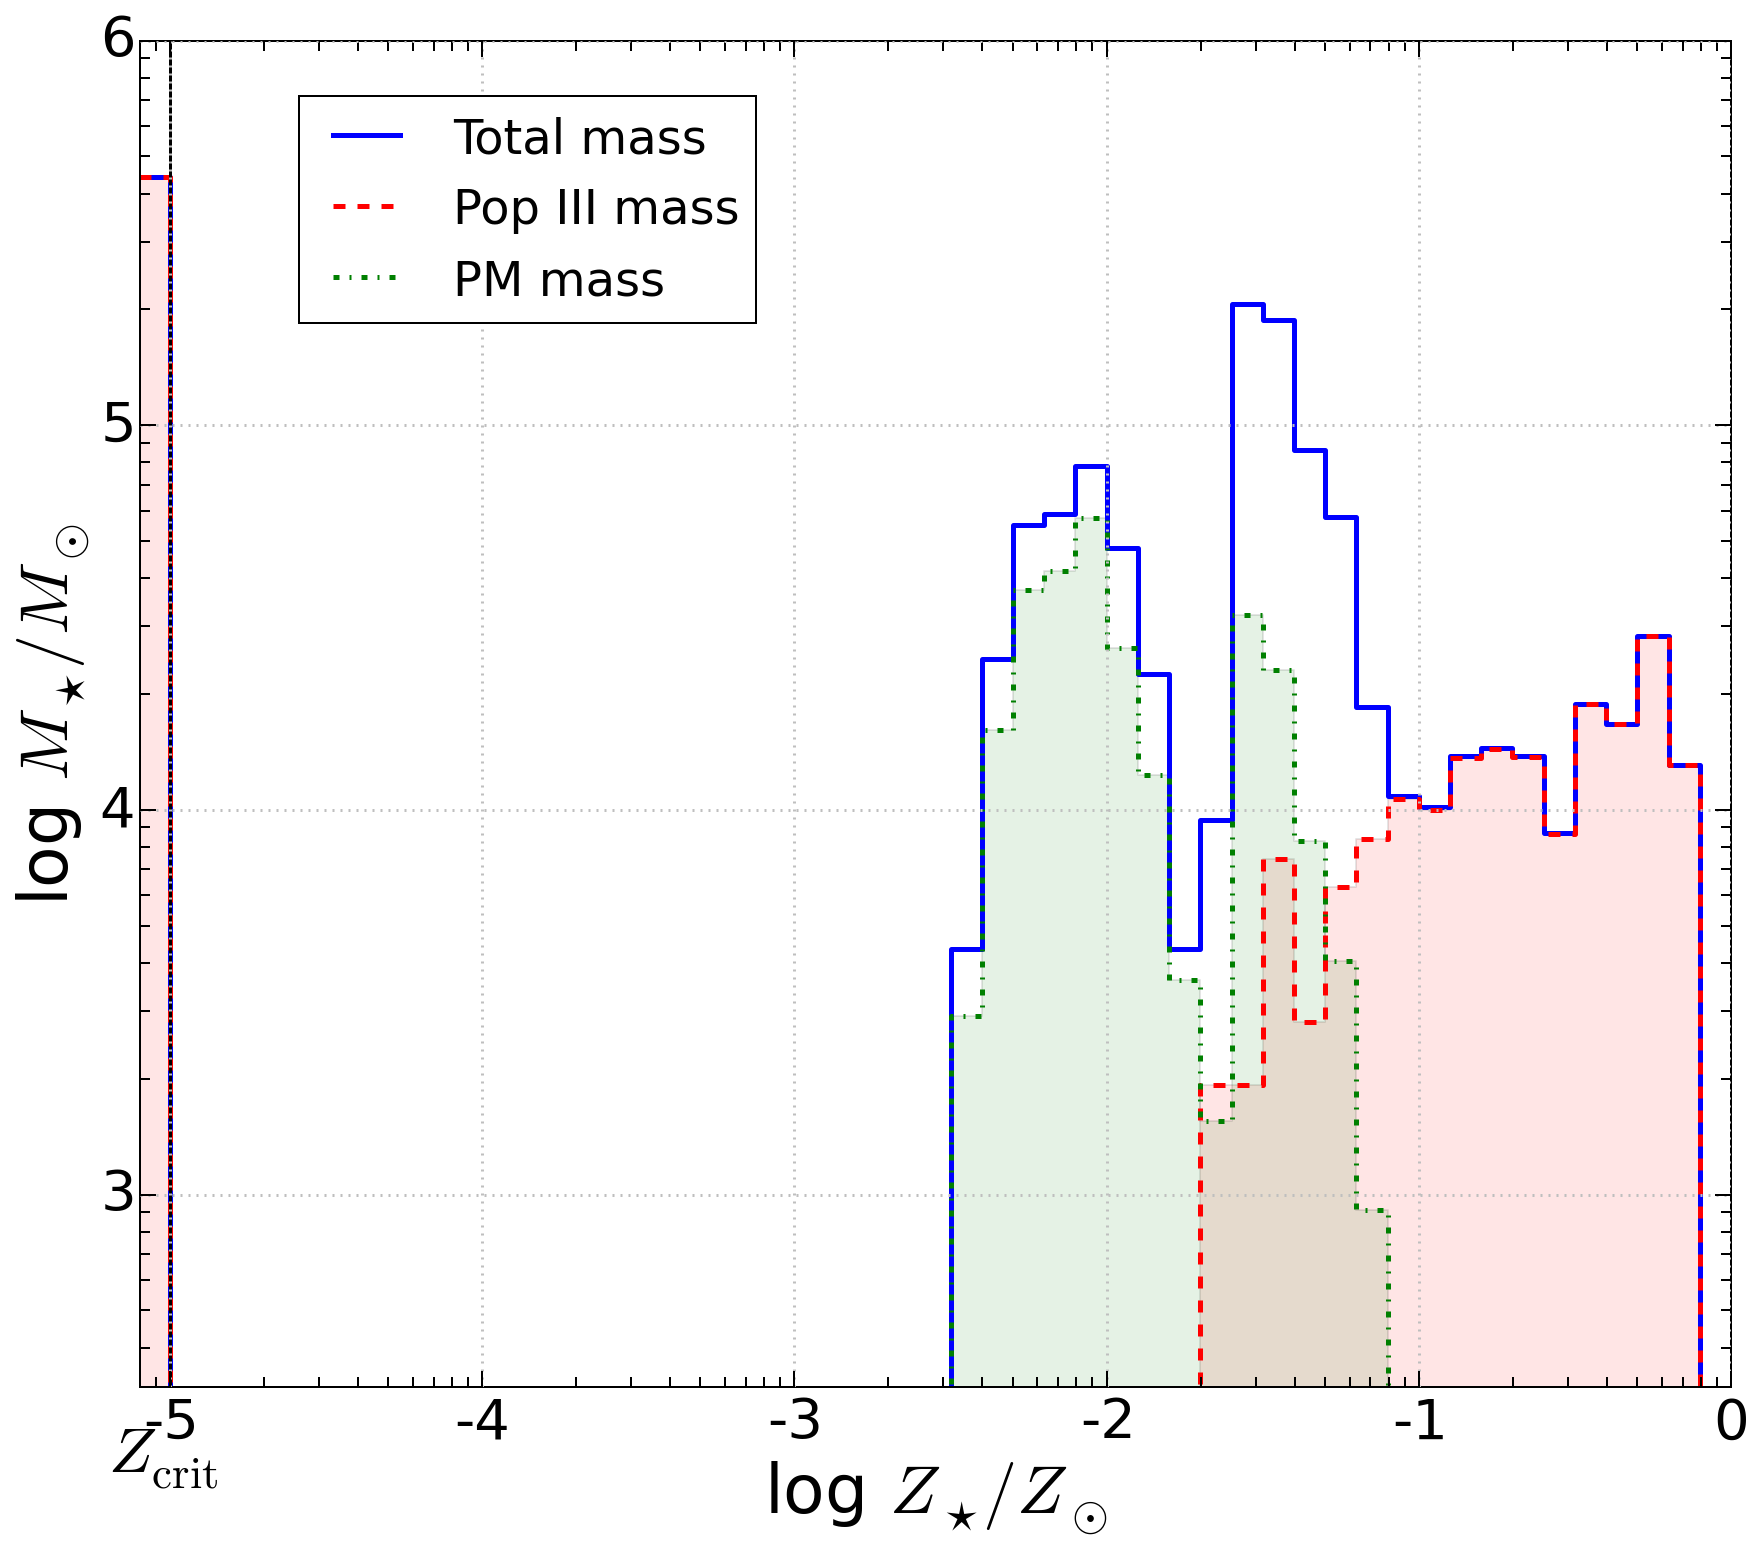

In [25]:
# With blocky transitions
 

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
fig = plt.figure()
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([8*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M_{\star}/M_{\odot}$', size=axLabelSize)

axHist.plot(newx,tsm2,'b-',  linewidth = 2.5)
axHist.plot(newx,psm2, 'r--', linewidth = 2.5 )
axHist.plot(newx,primsm2,'g-.', linewidth = 2.5 )
#axHist.plot(xrange4[1:numBins],zsm,'m:*', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(newx, 0, psm2, facecolor='r', alpha=0.1)
axHist.fill_between(newx, 0, primsm2, facecolor='g', alpha=0.1)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate(r"$Z_{\rm crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )
axHist.tick_params('both', length=5, width=1, which='minor')
axHist.tick_params('both', length=8, width=1, which='major')

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass'],
              loc=(0.1,0.79), fontsize=24 )
plt.savefig("Hist_HaloData_z={:04.1f}SFRegion_fpol_20kpc.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [ ]:
# Pop III fraction
subCrit = Zf < 1e-5
print("Class P3 to PopIII for halo ",np.sum(mass[subCrit])/np.sum(PPF * mass))
print("PopIII for halo ",1-(np.sum(fpol * mass))/(np.sum(mass)))
print("PM for halo ",(np.sum(fpol * mass * temp/Z))/(np.sum(mass)))


In [ ]:
popiii = Zf >= 10**-1.1 # Use -1.7 for z16, -1.2 for z8
print("Pristine fraction in range",
    1-(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))

In [ ]:
# z=8 halo -- highly polluted stars
popiii = (10**-1.8 < Zf) & (Zf < 10**-1.1)
print("Pristine in range",
 1-(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))
print("Polluted ",(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))


In [ ]:
# PM
cond = (10**-1.8 < Zf) & (Zf <= 10**-1.1)
print("PM in high range",
 (np.sum(fpol[cond] * mass[cond] * temp[cond]/Z[cond]))/(np.sum(mass[cond])))
print("Polluted in high range",
 (np.sum(fpol[cond] * mass[cond]))/(np.sum(mass[cond])))

cond = (10**-2.7 < Zf) & (Zf <= 10**-1.8)
print("PM in low range",
 (np.sum(fpol[cond] * mass[cond] * temp[cond]/Z[cond]))/(np.sum(mass[cond])))
print("PM fraction low range",
 (np.sum(fpol[cond] * mass[cond] * temp[cond]/Z[cond]))/(np.sum(fpol[cond]*mass[cond])))
print("Pristine in range",
 1-(np.sum(fpol[cond] * mass[cond]))/(np.sum(mass[cond])))

In [ ]:
print("PM metal fraction in halo",(np.sum(fpol* mass * temp/Z))/(np.sum(fpol*mass)))

In [ ]:
popiii = (10**-2.7 < Zf) & (Zf <= 10**-1.8)
print("PM in lower range",
 (np.sum(fpol[popiii] * mass[popiii] * temp[popiii]/Z[popiii]))/(np.sum(mass[popiii])))

In [ ]:
print("Halo AVE mass=",np.sum(mass)/len(mass))
print("Halo Median mass=",np.median(mass))
print("Halo Max mass=",np.max(mass))
print("")
print("Halo total mass=",np.sum(mass))
print("Total Pop III mass=",np.sum(PPF * mass))
print("Pop III fraction=",np.sum(PPF * mass)/np.sum(mass))
print("PopIII/Classical PopIII=",np.sum(PPF * mass)/np.sum(mass[Zf < 1e-5]))
print("Classic/PopIII=",np.sum(mass[Zf < 1e-5])/np.sum(PPF * mass))
print("Mass weighted ave Z =",np.sum(Zf * fpol * mass)/np.sum(mass))
print("PM in halo",(np.sum(fpol* mass * temp/Z))/(np.sum(fpol*mass)))

In [26]:
len(PPF)

1979

In [33]:
# Create columns over bin width
avePPF2 = np.empty((2*(avePPF.size)), dtype=avePPF.dtype)
avePPF2[0::2] = avePPF 
avePPF2[1::2] = avePPF
avePPF2[avePPF2<1e-6] = 0.0

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


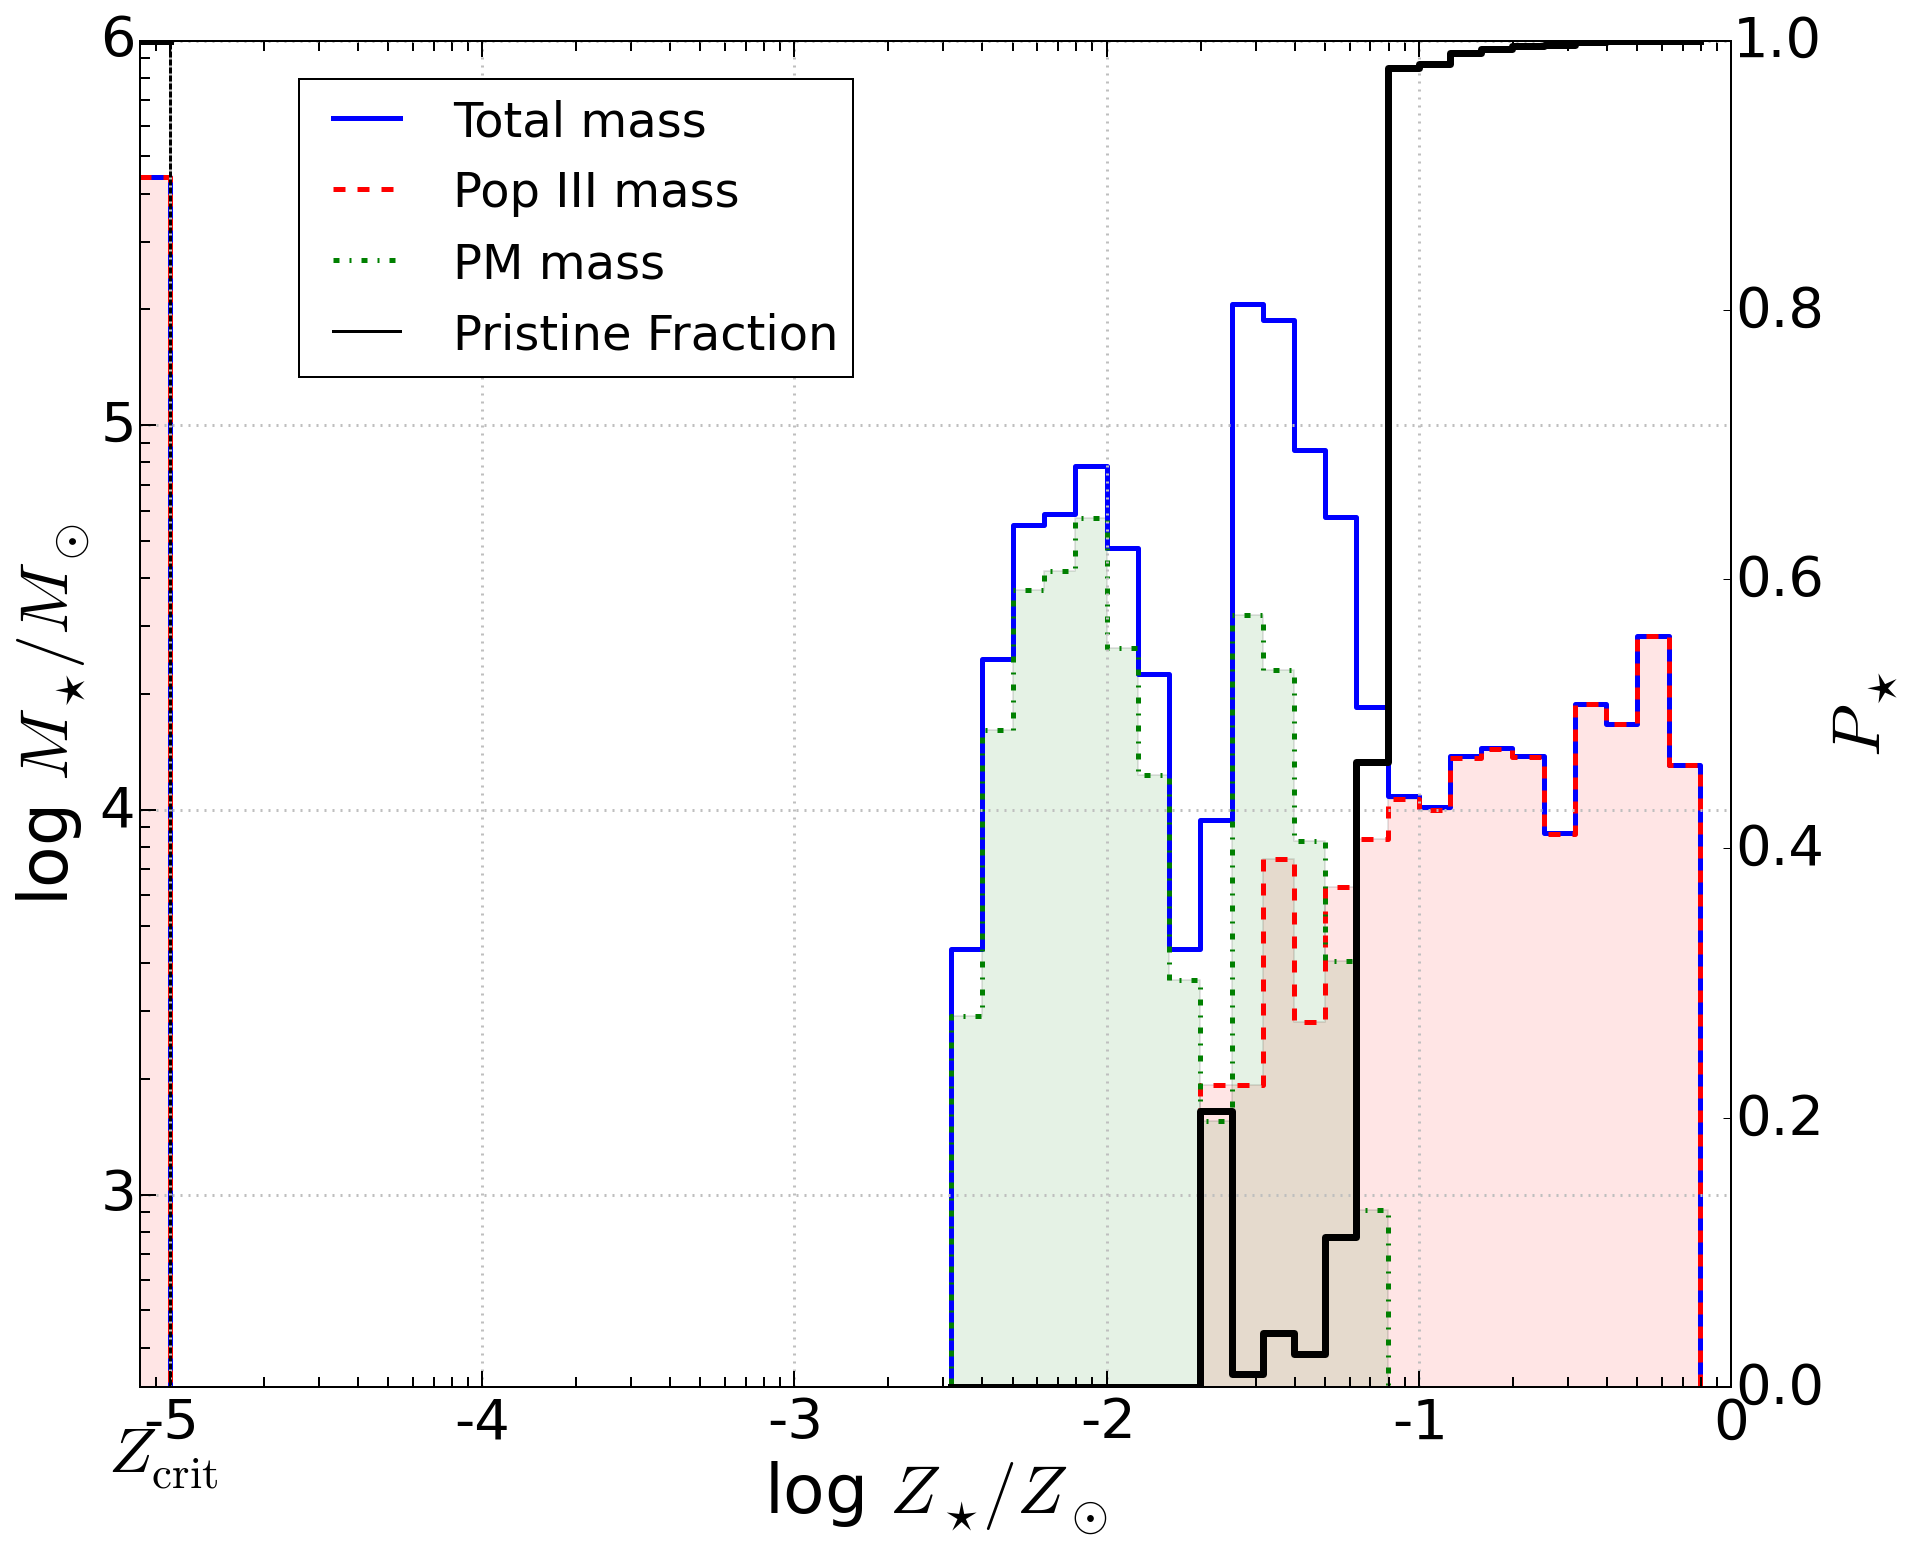

In [45]:
# With blocky transitions
# Dual axis

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
fig = plt.figure()
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([8*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M_{\star}/M_{\odot}$', size=axLabelSize)

axHist.plot(newx,tsm2,'b-',  linewidth = 2.5)
axHist.plot(newx,psm2, 'r--', linewidth = 2.5 )
axHist.plot(newx,primsm2,'g-.', linewidth = 2.5 )
#axHist.plot(xrange4[1:numBins],zsm,'m:*', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(newx, 0, psm2, facecolor='r', alpha=0.1)
axHist.fill_between(newx, 0, primsm2, facecolor='g', alpha=0.1)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate(r"$Z_{\rm crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )
axHist.tick_params('both', length=5, width=1, which='minor')
axHist.tick_params('both', length=8, width=1, which='major')

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass',r'Pristine Fraction'],
              loc=(0.1,0.75), fontsize=24 )


ax2 = axHist.twinx()
ax2.plot(newx,avePPF2,'k-', linewidth = 3.5 )
ax2.set_xlim([8*1e-6,1])
#ax2.set_ylim([0,1.01])
ax2.set_ylabel(r'$P_{\star}$', size=axLabelSize)


plt.savefig("Hist_HaloData_z={:04.1f}SFRegion_fpol_20kpc_dualAx.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
fig = plt.figure()
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)


axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([5*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M/M_{\odot}$', size=axLabelSize)
widthNorm = 6.5
axHist.bar(xrange1[0:numBins-1],tsm,    color='b', width=xrange1[0:numBins-1]/widthNorm, log=True, alpha=0.5)
axHist.bar(xrange2[0:numBins-1],psm,    color='r', width=xrange2[0:numBins-1]/widthNorm, log=True, alpha=0.5)
axHist.bar(xrange3[0:numBins-1],primsm, color='g', width=xrange3[0:numBins-1]/widthNorm, log=True, alpha=0.5)
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate("$Z_{crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass'],
              loc=(0.1,0.79), fontsize=24 )

plt.savefig("Hist_HaloData_z="+str(z)+"SFRegion_bar.pdf")
plt.show()